In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

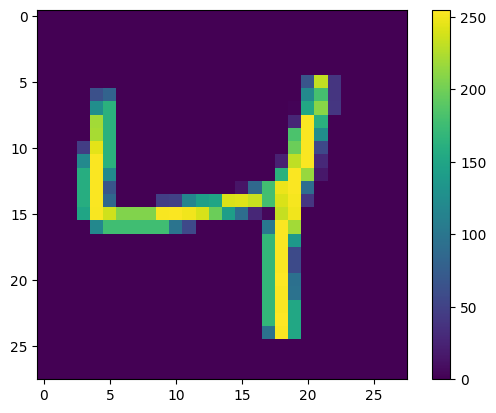

In [4]:
plt.imshow(train_images[2])
plt.colorbar()
plt.show()

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

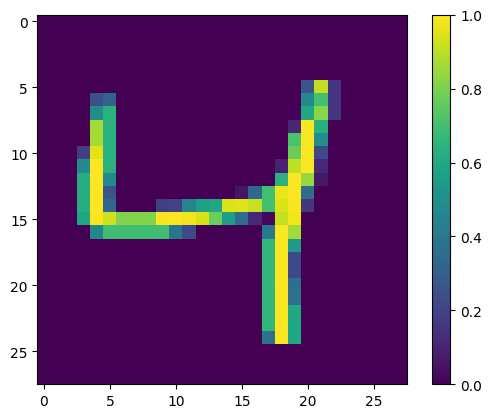

In [6]:
plt.imshow(train_images[2])
plt.colorbar()
plt.show()

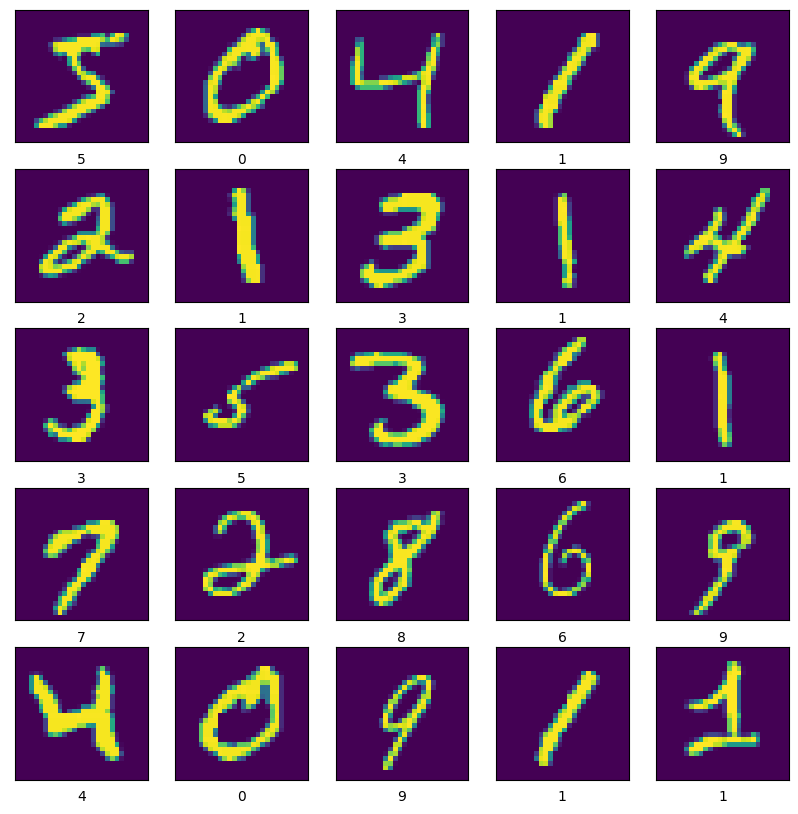

In [7]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
class MyCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, images, labels, batch_size):
        super().__init__()
        self.batch_size = batch_size
        self.images = images
        self.labels = labels
        self.accurs = []
        self.losses = []
        self.check_iter = 0

    def on_train_batch_end(self, epoch, logs=None):
        if epoch % (10000 // self.batch_size) == 0 and epoch != 0:
            loss, accur = self.model.evaluate(self.images, self.labels, verbose=0)
            print('\n\tCheckIteration: {}, Accuracy: {}, Loss: {:}'.format(self.check_iter, accur, loss))
            self.accurs.append(accur)
            self.losses.append(loss)
            self.check_iter += 1

batch_size = 64
my_callback = MyCallback(test_images, test_labels, batch_size)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=4, batch_size=batch_size, callbacks=[my_callback])

Epoch 1/4
156/938 [===>..........................] - ETA: 45s - loss: 0.3935 - accuracy: 0.8783
	CheckIteration: 0, Accuracy: 0.9617000222206116, Loss: 0.13309498131275177
312/938 [========>.....................] - ETA: 42s - loss: 0.1229 - accuracy: 0.9645
	CheckIteration: 1, Accuracy: 0.9731000065803528, Loss: 0.08982644975185394
468/938 [=============>................] - ETA: 33s - loss: 0.0888 - accuracy: 0.9744
	CheckIteration: 2, Accuracy: 0.9747999906539917, Loss: 0.08197001367807388
624/938 [==================>...........] - ETA: 22s - loss: 0.0810 - accuracy: 0.9746
	CheckIteration: 3, Accuracy: 0.9825000166893005, Loss: 0.05581553280353546
780/938 [=======================>......] - ETA: 11s - loss: 0.0577 - accuracy: 0.9819
	CheckIteration: 4, Accuracy: 0.9855999946594238, Loss: 0.046311430633068085
936/938 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9833
	CheckIteration: 5, Accuracy: 0.9866999983787537, Loss: 0.04289254918694496
938/938 [=========

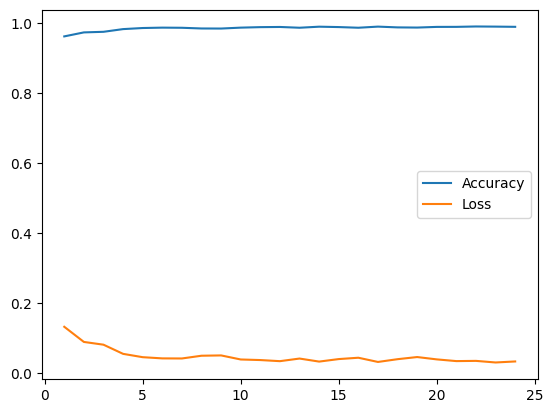

In [14]:
plt.plot(range(1, len(my_callback.accurs) + 1), my_callback.accurs, label="Accuracy")
plt.plot(range(1, len(my_callback.losses) + 1), my_callback.losses, label="Loss")
plt.legend()

In [15]:
# print(test_acc)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

313/313 - 3s - loss: 0.0347 - accuracy: 0.9889 - 3s/epoch - 8ms/step
Test accuracy: 0.9889000058174133 
Test loss: 0.03470742329955101


In [16]:
model.save_weights('./checkpoints/mnist_model_weights.h5')

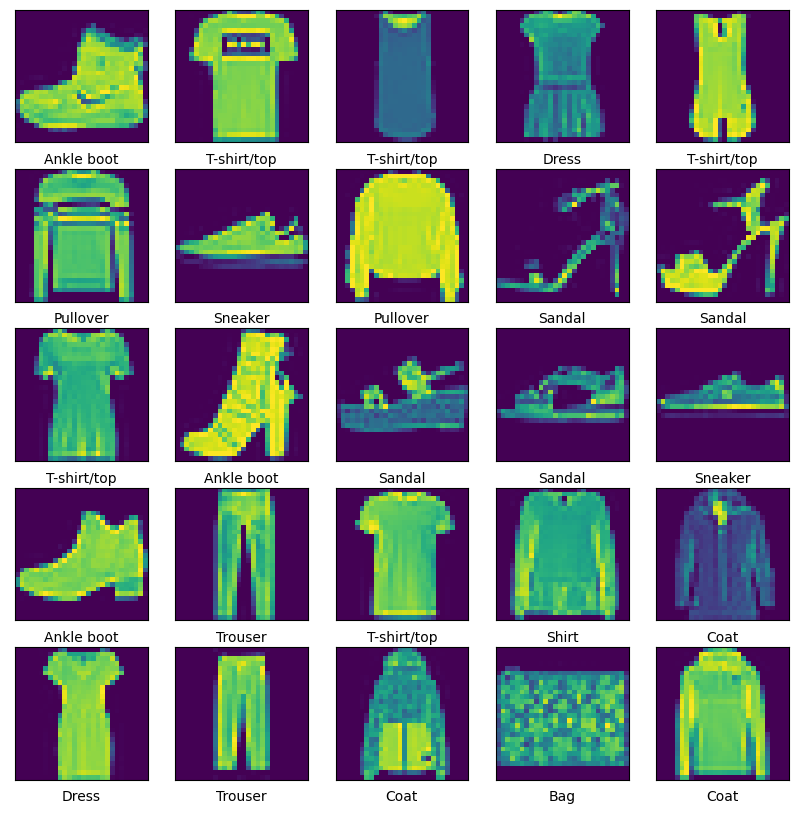

In [17]:
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()
fashion_train_images, fashion_test_images = fashion_train_images / 255.0, fashion_test_images / 255.0

fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_train_images[i])
    plt.xlabel(fashion_class_names[fashion_train_labels[i]])
plt.show()

In [18]:
fashion_model = models.Sequential()
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(64, activation='relu'))
fashion_model.add(layers.Dense(10))

fashion_batch_size = 64
my_fashion_callback = MyCallback(fashion_test_images, fashion_test_labels, fashion_batch_size)
fashion_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
fashion_model.fit(fashion_train_images, fashion_train_labels, epochs=4, batch_size=fashion_batch_size, callbacks=[my_fashion_callback])

Epoch 1/4
156/938 [===>..........................] - ETA: 45s - loss: 0.6879 - accuracy: 0.7483
	CheckIteration: 0, Accuracy: 0.8127999901771545, Loss: 0.4992988407611847
312/938 [========>.....................] - ETA: 41s - loss: 0.4717 - accuracy: 0.8248
	CheckIteration: 1, Accuracy: 0.8360999822616577, Loss: 0.43936899304389954
468/938 [=============>................] - ETA: 33s - loss: 0.4138 - accuracy: 0.8497
	CheckIteration: 2, Accuracy: 0.8709999918937683, Loss: 0.3663868308067322
623/938 [==================>...........] - ETA: 22s - loss: 0.3707 - accuracy: 0.8699
	CheckIteration: 3, Accuracy: 0.878600001335144, Loss: 0.3470466434955597
780/938 [=======================>......] - ETA: 11s - loss: 0.3375 - accuracy: 0.8810
	CheckIteration: 4, Accuracy: 0.8761000037193298, Loss: 0.35400545597076416
936/938 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8821
	CheckIteration: 5, Accuracy: 0.8823000192642212, Loss: 0.31907403469085693
938/938 [==============

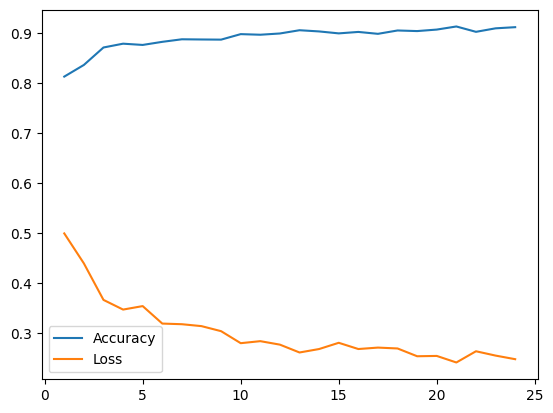

In [19]:
plt.plot(range(1, len(my_fashion_callback.accurs) + 1), my_fashion_callback.accurs, label="Accuracy")
plt.plot(range(1, len(my_fashion_callback.losses) + 1), my_fashion_callback.losses, label="Loss")
plt.legend()

In [20]:
fashion_test_loss, fashion_test_acc = fashion_model.evaluate(fashion_test_images, fashion_test_labels, verbose=2)
print('Test accuracy:', fashion_test_acc, '\nTest loss:', fashion_test_loss)

313/313 - 3s - loss: 0.2489 - accuracy: 0.9119 - 3s/epoch - 9ms/step
Test accuracy: 0.911899983882904 
Test loss: 0.24890564382076263


In [21]:
fashion_model3 = models.Sequential()
fashion_model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model3.add(layers.MaxPooling2D((2, 2)))
fashion_model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model3.add(layers.Flatten())
fashion_model3.add(layers.Dense(64, activation='relu'))
fashion_model3.add(layers.Dense(10))

my_fashion_callback3 = MyCallback(fashion_test_images, fashion_test_labels, fashion_batch_size)
fashion_model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics=['accuracy'])
fashion_model3.load_weights('./checkpoints/mnist_model_weights.h5')
fashion_model3.fit(fashion_train_images, fashion_train_labels, epochs=4, batch_size=fashion_batch_size, 
                   callbacks=[my_fashion_callback3])

Epoch 1/4
156/938 [===>..........................] - ETA: 49s - loss: 0.8513 - accuracy: 0.7257
	CheckIteration: 0, Accuracy: 0.8395000100135803, Loss: 0.46689605712890625
312/938 [========>.....................] - ETA: 44s - loss: 0.4373 - accuracy: 0.8478
	CheckIteration: 1, Accuracy: 0.859000027179718, Loss: 0.39871829748153687
468/938 [=============>................] - ETA: 34s - loss: 0.3791 - accuracy: 0.8658
	CheckIteration: 2, Accuracy: 0.8709999918937683, Loss: 0.3624928593635559
624/938 [==================>...........] - ETA: 23s - loss: 0.3413 - accuracy: 0.8775
	CheckIteration: 3, Accuracy: 0.883400022983551, Loss: 0.32687267661094666
780/938 [=======================>......] - ETA: 11s - loss: 0.3157 - accuracy: 0.8878
	CheckIteration: 4, Accuracy: 0.8855999708175659, Loss: 0.31965216994285583
936/938 [============================>.] - ETA: 0s - loss: 0.3083 - accuracy: 0.8893
	CheckIteration: 5, Accuracy: 0.8938000202178955, Loss: 0.2978397607803345
938/938 [==============

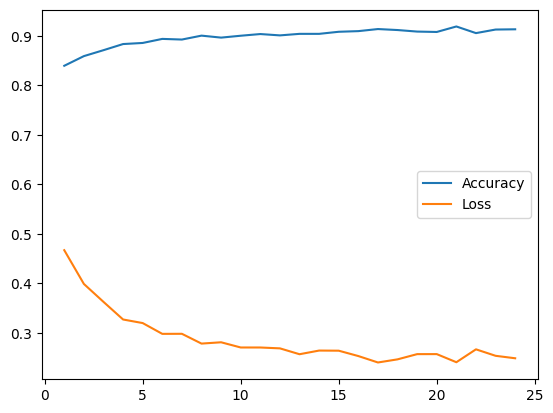

In [22]:
plt.plot(range(1, len(my_fashion_callback3.accurs) + 1), my_fashion_callback3.accurs, label="Accuracy")
plt.plot(range(1, len(my_fashion_callback3.losses) + 1), my_fashion_callback3.losses, label="Loss")
plt.legend()

In [23]:
fashion_test_loss3, fashion_test_acc3 = fashion_model3.evaluate(fashion_test_images, fashion_test_labels, verbose=2)
print('Test accuracy:', fashion_test_acc3, '\nTest loss:', fashion_test_loss3)

313/313 - 3s - loss: 0.2501 - accuracy: 0.9124 - 3s/epoch - 9ms/step
Test accuracy: 0.9124000072479248 
Test loss: 0.2500949203968048


In [24]:
fashion_model4 = models.Sequential()
fashion_model4.add(layers.Conv2D(64, (3, 3), activation='relu', trainable=False, input_shape=(28, 28, 1)))
fashion_model4.add(layers.MaxPooling2D((2, 2)))
fashion_model4.add(layers.Conv2D(64, (3, 3), activation='relu', trainable=False))
fashion_model4.add(layers.Flatten())
fashion_model4.add(layers.Dense(64, activation='relu'))
fashion_model4.add(layers.Dense(10))

my_fashion_callback4 = MyCallback(fashion_test_images, fashion_test_labels, fashion_batch_size)
fashion_model4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics=['accuracy'])
fashion_model4.load_weights('./checkpoints/mnist_model_weights.h5')
fashion_model4.fit(fashion_train_images, fashion_train_labels, epochs=4, batch_size=fashion_batch_size, 
                   callbacks=[my_fashion_callback4])

Epoch 1/4
154/938 [===>..........................] - ETA: 18s - loss: 0.9698 - accuracy: 0.7047
	CheckIteration: 0, Accuracy: 0.8098000288009644, Loss: 0.5608888268470764
310/938 [========>.....................] - ETA: 20s - loss: 0.5222 - accuracy: 0.8214
	CheckIteration: 1, Accuracy: 0.8406999707221985, Loss: 0.4617592394351959
468/938 [=============>................] - ETA: 16s - loss: 0.4343 - accuracy: 0.8495
	CheckIteration: 2, Accuracy: 0.8561000227928162, Loss: 0.4185824692249298
624/938 [==================>...........] - ETA: 11s - loss: 0.4006 - accuracy: 0.8615
	CheckIteration: 3, Accuracy: 0.8647000193595886, Loss: 0.39114242792129517
780/938 [=======================>......] - ETA: 6s - loss: 0.3780 - accuracy: 0.8684
	CheckIteration: 4, Accuracy: 0.869700014591217, Loss: 0.3680979609489441
936/938 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8779
	CheckIteration: 5, Accuracy: 0.8736000061035156, Loss: 0.3636591136455536
938/938 [=================

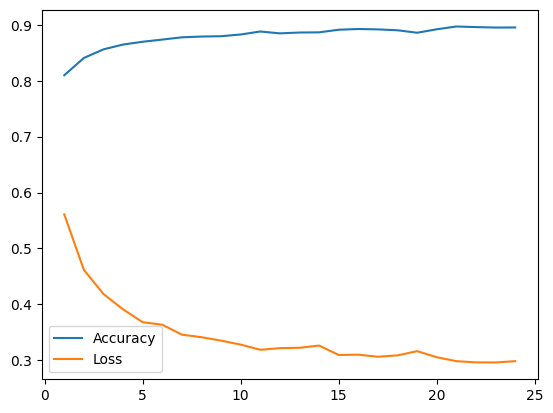

In [25]:
plt.plot(range(1, len(my_fashion_callback4.accurs) + 1), my_fashion_callback4.accurs, label="Accuracy")
plt.plot(range(1, len(my_fashion_callback4.losses) + 1), my_fashion_callback4.losses, label="Loss")
plt.legend()

In [26]:
fashion_test_loss4, fashion_test_acc4 = fashion_model4.evaluate(fashion_test_images, fashion_test_labels, verbose=2)
print('Test accuracy:', fashion_test_acc4, '\nTest loss:', fashion_test_loss4)

313/313 - 3s - loss: 0.2987 - accuracy: 0.8948 - 3s/epoch - 9ms/step
Test accuracy: 0.8948000073432922 
Test loss: 0.29873597621917725


In [27]:
fashion_model5 = models.Sequential()
fashion_model5.add(layers.Conv2D(64, (3, 3), activation='relu', trainable=False, input_shape=(28, 28, 1)))
fashion_model5.add(layers.MaxPooling2D((2, 2)))
fashion_model5.add(layers.Conv2D(64, (3, 3), activation='relu', trainable=False))
fashion_model5.add(layers.Flatten())
fashion_model5.add(layers.Dense(64, activation='relu'))
fashion_model5.add(layers.Dense(10))

my_fashion_callback5_freeze = MyCallback(fashion_test_images, fashion_test_labels, fashion_batch_size)
fashion_model5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics=['accuracy'])
fashion_model5.load_weights('./checkpoints/mnist_model_weights.h5')
fashion_model5.fit(fashion_train_images, fashion_train_labels, epochs=2, batch_size=fashion_batch_size, 
                   callbacks=[my_fashion_callback5_freeze])

for l in fashion_model5.layers:
    if isinstance(l, tf.keras.layers.Conv2D):
        l.trainable = True

my_fashion_callback5_unfreeze = MyCallback(fashion_test_images, fashion_test_labels, fashion_batch_size)
fashion_model5.fit(fashion_train_images, fashion_train_labels, epochs=2, batch_size=fashion_batch_size, 
                   callbacks=[my_fashion_callback5_unfreeze])

Epoch 1/2
155/938 [===>..........................] - ETA: 19s - loss: 0.9638 - accuracy: 0.7071
	CheckIteration: 0, Accuracy: 0.7997000217437744, Loss: 0.5658062696456909
311/938 [========>.....................] - ETA: 21s - loss: 0.5237 - accuracy: 0.8134
	CheckIteration: 1, Accuracy: 0.8442999720573425, Loss: 0.4489414095878601
466/938 [=============>................] - ETA: 17s - loss: 0.4290 - accuracy: 0.8530
	CheckIteration: 2, Accuracy: 0.8521000146865845, Loss: 0.4201301634311676
624/938 [==================>...........] - ETA: 11s - loss: 0.3965 - accuracy: 0.8614
	CheckIteration: 3, Accuracy: 0.8651999831199646, Loss: 0.3848256468772888
779/938 [=======================>......] - ETA: 6s - loss: 0.3704 - accuracy: 0.8709
	CheckIteration: 4, Accuracy: 0.866599977016449, Loss: 0.37082043290138245
935/938 [============================>.] - ETA: 0s - loss: 0.3560 - accuracy: 0.8729
	CheckIteration: 5, Accuracy: 0.876800000667572, Loss: 0.353456050157547
938/938 [===================

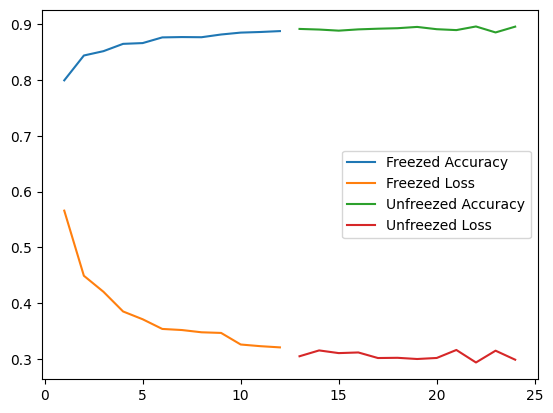

In [28]:
plt.plot(range(1, len(my_fashion_callback5_freeze.accurs) + 1), my_fashion_callback5_freeze.accurs, label="Freezed Accuracy")
plt.plot(range(1, len(my_fashion_callback5_freeze.losses) + 1), my_fashion_callback5_freeze.losses, label="Freezed Loss")
plt.plot(range(len(my_fashion_callback5_freeze.accurs) + 1, len(my_fashion_callback5_freeze.accurs) + len(my_fashion_callback5_unfreeze.accurs) + 1), my_fashion_callback5_unfreeze.accurs, label="Unfreezed Accuracy")
plt.plot(range(len(my_fashion_callback5_freeze.losses) + 1, len(my_fashion_callback5_freeze.losses) + len(my_fashion_callback5_unfreeze.losses) + 1), my_fashion_callback5_unfreeze.losses, label="Unfreezed Loss")
plt.legend()

In [29]:
fashion_test_loss5, fashion_test_acc5 = fashion_model5.evaluate(fashion_test_images, fashion_test_labels, verbose=2)
print('Test accuracy:', fashion_test_acc5, '\nTest loss:', fashion_test_loss5)

313/313 - 3s - loss: 0.2981 - accuracy: 0.8966 - 3s/epoch - 8ms/step
Test accuracy: 0.8966000080108643 
Test loss: 0.2980549931526184
